# Import libraries and common functions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
import plotly.express as px

In [4]:
import nbimporter
%run -i Common_Functions.ipynb
from Common_Functions import *

# Data view

In [7]:
file_path = "NEM Registration and Exemption List.xlsx"
df_participants = pd.read_excel(file_path, sheet_name='PU and Scheduled Loads')

In [8]:
df_participants.head()

,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Units,Aggregation,DUID,Reg Cap generation (MW),Max Cap generation (MW),Max ROC/Min generation,Reg Cap consumption (MW),Max Cap consumption (MW),Max ROC/Min consumption,Comments
0,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,1-3,Y,ADPBA1G,7.76,6.15,2,NaN,NaN,NaN,NaN
1,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Load,Market,Scheduled,Battery storage,Grid,Storage,Battery and Inverter,1-3,Y,ADPBA1L,7.76,6.15,2,NaN,NaN,NaN,NaN
2,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Non-Scheduled,Hydro,Water,Renewable,Run of River,1-2,Y,ADPMH1,1.44,1,-,NaN,NaN,NaN,NaN
3,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Semi-Scheduled,Solar,Solar,Renewable,Photovoltaic Tracking Flat panel,"1-4, 5-9",Y,ADPPV1,24.75,19,4,NaN,NaN,NaN,NaN
4,South Australian Water Corporation,Adelaide Desalination Plant,SA1,Generating Unit,Market,Non-Scheduled,Solar,Solar,Renewable,Photovoltaic Flat panel,1-2,Y,ADPPV2,0.2,0.2,-,NaN,NaN,NaN,NaN


In [9]:
df_participants['Fuel Source - Descriptor'].unique()

array(['Grid', 'Water', 'Solar', 'Diesel', 'Waste Coal Mine Gas', 'Wind',
       'Natural Gas', nan, 'Black Coal', 'Sewerage / Waste Water',
       'Coal Seam Methane', 'Bagasse', 'Landfill Methane / Landfill Gas',
       'Biogas - sludge', 'Solar ', 'Natural Gas / Diesel', 'Ethane',
       'Brown Coal', 'solar', 'Kerosene', '-', 'Natural Gas / Fuel Oil',
       'Bagasse and Diesel'], dtype=object)

In [10]:
df_dispatchprice = read_nem_data("DISPATCHPRICE", "2019-01-01", "2025-01-01")

✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201901010000.CSV, rows: 45476
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201902010000.CSV, rows: 42751
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201903010000.CSV, rows: 49201
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201904010000.CSV, rows: 52681
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201905010000.CSV, rows: 47851
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201906010000.CSV, rows: 47986
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201907010000.CSV, rows: 55081
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201908010000.CSV, rows: 49981
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201909010000.CSV, rows: 50791
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201910010000.CSV, rows: 55381
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCHPRICE_201911010000.CSV, rows: 58716
✅ Loaded data from extracted_csv

In [11]:
df_demand = read_nem_data("PERDEMAND", "2019-01-01", "2025-01-01")

✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201901010000.CSV, rows: 2914561
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201902010000.CSV, rows: 2633521
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201903010000.CSV, rows: 2913361
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201904010000.CSV, rows: 2822401
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201905010000.CSV, rows: 2916481
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201906010000.CSV, rows: 2820481
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201907010000.CSV, rows: 2916481
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201908010000.CSV, rows: 2911921
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201909010000.CSV, rows: 2819281
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201910010000.CSV, rows: 2902321
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_201911010000.CSV, rows: 2820433
✅ Loaded data from extracted_csv/PUBLIC_DVD_PERDEMAND_

In [12]:
df_scada = read_nem_data("DISPATCH_UNIT_SCADA", "2019-01-01", "2025-01-01")

✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201901010000.CSV, rows: 2831589
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201902010000.CSV, rows: 2577552
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201903010000.CSV, rows: 2869806
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201904010000.CSV, rows: 2796195
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201905010000.CSV, rows: 2901604
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201906010000.CSV, rows: 2838273
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201907010000.CSV, rows: 2945783
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201908010000.CSV, rows: 2954559
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201909010000.CSV, rows: 2867042
✅ Loaded data from extracted_csv/PUBLIC_DVD_DISPATCH_UNIT_SCADA_201910010000.CSV, rows: 2981574
✅ Loaded data from extracted_csv/PUBLIC_

/var/folders/b6/bmslj24d11n41826_8m7yb400000gn/T/ipykernel_3604/1439474265.py:31: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(file_path, skiprows=1)  # Skip first row


✅ Loaded data from extracted_csv/PUBLIC_ARCHIVE#DISPATCH_UNIT_SCADA#FILE01#202411010000.CSV, rows: 3902492
✅ Loaded data from extracted_csv/PUBLIC_ARCHIVE#DISPATCH_UNIT_SCADA#FILE01#202412010000.CSV, rows: 4048391
✅ Loaded data from extracted_csv/PUBLIC_ARCHIVE#DISPATCH_UNIT_SCADA#FILE01#202501010000.CSV, rows: 4058257
🎉 Successfully concatenated 256450281 rows from all files!


In [55]:
df_summary = read_nem_data("DUDETAILSUMMARY", "2019-01-01", "2025-01-01")

✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201901010000.CSV, rows: 8977
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201902010000.CSV, rows: 8978
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201903010000.CSV, rows: 8984
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201904010000.CSV, rows: 8985
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201905010000.CSV, rows: 8994
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201906010000.CSV, rows: 9494
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201907010000.CSV, rows: 9496
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201908010000.CSV, rows: 9499
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201909010000.CSV, rows: 9506
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201910010000.CSV, rows: 9522
✅ Loaded data from extracted_csv/PUBLIC_DVD_DUDETAILSUMMARY_201911010000.CSV, rows: 9527
✅ Loaded data from ex

<div style="background-color: lightblue; padding: 10px;">

My strategy for these datasets are groupby hour to reduce the data for 2D Exploration or next step I also sample 20% of data for 1D exploration, because they are over 200M rows of data that the yare too big.
</div>

In [12]:
df_dispatchprice.head(3)

,I,DISPATCH,PRICE,1,SETTLEMENTDATE,RUNNO,REGIONID,DISPATCHINTERVAL,INTERVENTION,RRP,...,RAISE1SECRRP,RAISE1SECROP,RAISE1SECAPCFLAG,LOWER1SECRRP,LOWER1SECROP,LOWER1SECAPCFLAG,PRE_AP_RAISE1_PRICE,PRE_AP_LOWER1_PRICE,CUMUL_PRE_AP_RAISE1_PRICE,CUMUL_PRE_AP_LOWER1_PRICE
0,D,DISPATCH,PRICE,1.0,2019/01/01 00:05:00,1.0,NSW1,2.018123e+10,0.0,68.09260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D,DISPATCH,PRICE,1.0,2019/01/01 00:05:00,1.0,QLD1,2.018123e+10,0.0,64.82955,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D,DISPATCH,PRICE,1.0,2019/01/01 00:05:00,1.0,SA1,2.018123e+10,0.0,76.50000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_demand.head(3)

,I,DEMAND,PERIOD,1,EFFECTIVEDATE,SETTLEMENTDATE,REGIONID,OFFERDATE,PERIODID,VERSIONNO,RESDEMAND,DEMAND90PROBABILITY,DEMAND10PROBABILITY,LASTCHANGED,MR_SCHEDULE
0,D,DEMAND,PERIOD,1.0,2019/01/01 00:00:00,2019/01/01 00:00:00,NSW1,2018/12/25 00:00:00,1.0,1.0,6562.0,6209.0,6915.0,2018/12/25 00:28:20,0.0
1,D,DEMAND,PERIOD,1.0,2019/01/01 00:00:00,2019/01/01 00:00:00,NSW1,2018/12/25 00:00:00,2.0,1.0,6609.0,6253.0,6964.0,2018/12/25 00:28:20,0.0
2,D,DEMAND,PERIOD,1.0,2019/01/01 00:00:00,2019/01/01 00:00:00,NSW1,2018/12/25 00:00:00,3.0,1.0,6762.0,6398.0,7126.0,2018/12/25 00:28:20,0.0


In [14]:
df_scada.head(3)

,I,DISPATCH,UNIT_SCADA,1,SETTLEMENTDATE,DUID,SCADAVALUE,LASTCHANGED
0,D,DISPATCH,UNIT_SCADA,1.0,2019/01/01 00:05:00,BARCSF1,0.500000,NaN
1,D,DISPATCH,UNIT_SCADA,1.0,2019/01/01 00:05:00,BUTLERSG,10.299998,NaN
2,D,DISPATCH,UNIT_SCADA,1.0,2019/01/01 00:05:00,CALL_A_4,0.000000,NaN


In [13]:
dfscada = df_scada[df_scada['I'] == "D"]

In [17]:
df_price_grouped = groupby_columns_agg_by_date_hour(df=df_dispatchprice,\
                                 date_column='SETTLEMENTDATE',\
                                 group_columns=['REGIONID'], \
                                 value_column='RRP',\
                                agg_method="avg")

In [18]:
df_price_grouped.count()

REGIONID     266765
Date_Hour    266765
RRP          266765
dtype: int64

In [19]:
df_price_grouped.to_csv("PRICE_groupby_hour_regionid_avg.csv", index=False)

In [20]:
df_demand_grouped = groupby_columns_agg_by_date_hour(df=df_demand,\
                                 date_column='SETTLEMENTDATE',\
                                 group_columns=['REGIONID'], \
                                 value_column='RESDEMAND',\
                                agg_method="sum")

In [21]:
df_demand_grouped.count()

REGIONID     11115
Date_Hour    11115
RESDEMAND    11115
dtype: int64

In [22]:
df_demand_grouped.to_csv("DEMAND_groupby_hour_regionid_sum.csv", index=False)

In [ ]:
df_participants_select = df_participants[['Fuel Source - Descriptor', 'DUID', 'Technology Type - Primary', 'Region']]
df_scada_merged_participants = dfscada.merge(df_participants_select, on="DUID", how="left")

In [ ]:
df_scada_grouped = groupby_columns_agg_by_date_hour_duid_keep(df=df_scada_merged_participants,\
                                 date_column='SETTLEMENTDATE',\
                                 group_columns=['Region'], \
                                 value_column='SCADAVALUE',\
                                duid_column='DUID',\
                                agg_method="sum")

In [ ]:
df_scada_grouped.count()

In [ ]:
df_scada_grouped.to_csv("SCADA_JOINED_groupby_hour_regionid_sum.csv", index=False)

# EDA 

## 1D Exploration

<div style="background-color: lightblue; padding: 10px;">

The data used for this EDA is now from 5 sources:
-  DISPATCH_UNIT_SCADA for power generation.
-  DUDETAILSUMMARY for dispatchable unit details.
-  PERDEMAND for demand data.
-  DISPATCHPRICE for pricing data.
-  Data from "NEM Registration and Exemption List.xlsx" file for energy types.

Data used is from Jan 2019 to Jan 2025.

</div>

<div style="background-color: lightblue; padding: 10px;">
We need to sample data before use.
</div>

In [14]:
df_price_sample = sample_data(df=df_dispatchprice, \
                              sample_fraction=0.05)

In [15]:
df_demand_sample = sample_data(df=df_demand, \
                              sample_fraction=0.05)

In [16]:
df_scada_sample = sample_data(df=df_scada, \
                              sample_fraction=0.05)

In [17]:
df_price_sample.to_csv("PRICE_sample_0.05.csv", index=False)
df_demand_sample.to_csv("DEMAND_sample_0.05.csv", index=False)
df_scada_sample.to_csv("SCADA_sample_0.05.csv", index=False)

## Data Summary

In [24]:
df_price_sample.columns

Index(['I', 'DISPATCH', 'PRICE', '1', 'SETTLEMENTDATE', 'RUNNO', 'REGIONID',
       'DISPATCHINTERVAL', 'INTERVENTION', 'RRP', 'EEP', 'ROP', 'APCFLAG',
       'MARKETSUSPENDEDFLAG', 'LASTCHANGED', 'RAISE6SECRRP', 'RAISE6SECROP',
       'RAISE6SECAPCFLAG', 'RAISE60SECRRP', 'RAISE60SECROP',
       'RAISE60SECAPCFLAG', 'RAISE5MINRRP', 'RAISE5MINROP', 'RAISE5MINAPCFLAG',
       'RAISEREGRRP', 'RAISEREGROP', 'RAISEREGAPCFLAG', 'LOWER6SECRRP',
       'LOWER6SECROP', 'LOWER6SECAPCFLAG', 'LOWER60SECRRP', 'LOWER60SECROP',
       'LOWER60SECAPCFLAG', 'LOWER5MINRRP', 'LOWER5MINROP', 'LOWER5MINAPCFLAG',
       'LOWERREGRRP', 'LOWERREGROP', 'LOWERREGAPCFLAG', 'PRICE_STATUS',
       'PRE_AP_ENERGY_PRICE', 'PRE_AP_RAISE6_PRICE', 'PRE_AP_RAISE60_PRICE',
       'PRE_AP_RAISE5MIN_PRICE', 'PRE_AP_RAISEREG_PRICE',
       'PRE_AP_LOWER6_PRICE', 'PRE_AP_LOWER60_PRICE', 'PRE_AP_LOWER5MIN_PRICE',
       'PRE_AP_LOWERREG_PRICE', 'CUMUL_PRE_AP_ENERGY_PRICE',
       'CUMUL_PRE_AP_RAISE6_PRICE', 'CUMUL_PRE_AP_RAI

In [29]:
df_demand_sample.columns

Index(['I', 'DEMAND', 'PERIOD', '1', 'EFFECTIVEDATE', 'SETTLEMENTDATE',
       'REGIONID', 'OFFERDATE', 'PERIODID', 'VERSIONNO', 'RESDEMAND',
       'DEMAND90PROBABILITY', 'DEMAND10PROBABILITY', 'LASTCHANGED',
       'MR_SCHEDULE'],
      dtype='object')

In [27]:
summarize_table_info(df_price_sample[['DISPATCH', 'PRICE', 'SETTLEMENTDATE', 'REGIONID', 'RRP', 'EEP', 'ROP', 'PRICE_STATUS']])

,Column,Type,Num Rows,Num Non-Null Rows,Min,Max,Mean,Median,Std Dev,Num Unique,Most Freq Value,Most Freq Count,Least Freq Value,Least Freq Count,Num Nulls,Num Zeros
0,DISPATCH,object,165401,165401,nan,nan,nan,nan,nan,2,DISPATCH,165398,END OF REPORT,3,0,nan
1,PRICE,object,165401,165401,nan,nan,nan,nan,nan,4,PRICE,165398,44643,1,0,nan
2,SETTLEMENTDATE,object,165401,165398,nan,nan,nan,nan,nan,148624,2019/06/09 06:00:00,5,2020/10/10 06:35:00,1,3,nan
3,REGIONID,object,165401,165398,nan,nan,nan,nan,nan,5,TAS1,33221,NSW1,32967,3,nan
4,RRP,float64,165401,165398,-1000.000000,17500.000000,88.664568,60.964670,359.925728,114800,0.000000,707,145.690750,1,3,707.000000
5,EEP,float64,165401,165398,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,165398,0.000000,165398,3,165398.000000
6,ROP,float64,165401,165398,-1000.003810,2265000.000000,1171.253437,60.799880,31087.227625,115096,0.000000,718,277.399960,1,3,718.000000
7,PRICE_STATUS,object,165401,165398,nan,nan,nan,nan,nan,1,FIRM,165398,FIRM,165398,3,nan


In [31]:
summarize_table_info(df_demand_sample[['DEMAND', 'PERIOD', 'EFFECTIVEDATE', 'SETTLEMENTDATE',
       'REGIONID', 'OFFERDATE', 'PERIODID', 'RESDEMAND',
       'DEMAND90PROBABILITY', 'DEMAND10PROBABILITY', 'LASTCHANGED']])

,Column,Type,Num Rows,Num Non-Null Rows,Min,Max,Mean,Median,Std Dev,Num Unique,Most Freq Value,Most Freq Count,Least Freq Value,Least Freq Count,Num Nulls,Num Zeros
0,DEMAND,object,10074618,10074618,nan,nan,nan,nan,nan,2,DEMAND,10074613,END OF REPORT,5,0,nan
1,PERIOD,object,10074618,10074618,nan,nan,nan,nan,nan,4,PERIOD,10074613,2726883,1,0,nan
2,EFFECTIVEDATE,object,10074618,10074613,nan,nan,nan,nan,nan,2223,2020/08/18 00:00:00,4944,2025/01/22 00:00:00,2485,5,nan
3,SETTLEMENTDATE,object,10074618,10074613,nan,nan,nan,nan,nan,2223,2020/08/18 00:00:00,4944,2025/01/22 00:00:00,2485,5,nan
4,REGIONID,object,10074618,10074613,nan,nan,nan,nan,nan,5,NSW1,2015868,VIC1,2013207,5,nan
5,OFFERDATE,object,10074618,10074613,nan,nan,nan,nan,nan,2231,2024/01/26 00:00:00,4928,2025/02/01 00:00:00,81,5,nan
6,PERIODID,float64,10074618,10074613,1.000000,48.000000,24.499451,25.000000,13.852506,48,8.000000,210747,5.000000,208693,5,0.000000
7,RESDEMAND,float64,10074618,10074613,-77555.000000,14221.000000,4195.981873,4582.000000,2745.478640,13419,1059.000000,8497,-129.000000,1,5,15.000000
8,DEMAND90PROBABILITY,float64,10074618,10074613,-77555.000000,13628.000000,3991.907884,4337.000000,2652.288230,12880,1010.000000,9250,12461.000000,1,5,19.000000
9,DEMAND10PROBABILITY,float64,10074618,10074613,-77555.000000,14813.000000,4400.056172,4824.000000,2842.265325,14143,1139.000000,7567,13498.000000,1,5,17.000000


In [32]:
summarize_table_info(df_scada_sample)

,Column,Type,Num Rows,Num Non-Null Rows,Min,Max,Mean,Median,Std Dev,Num Unique,Most Freq Value,Most Freq Count,Least Freq Value,Least Freq Count,Num Nulls,Num Zeros
0,I,object,12822514,12822514,nan,nan,nan,nan,nan,2,D,12822513,C,1,0,nan
1,DISPATCH,object,12822514,12822514,nan,nan,nan,nan,nan,2,DISPATCH,12822513,END OF REPORT,1,0,nan
2,UNIT_SCADA,object,12822514,12822514,nan,nan,nan,nan,nan,2,UNIT_SCADA,12822513,3936158,1,0,nan
3,1,float64,12822514,12822513,1.000000,1.000000,1.000000,1.000000,0.000000,1,1.000000,12822513,1.000000,12822513,1,0.000000
4,SETTLEMENTDATE,object,12822514,12822513,nan,nan,nan,nan,nan,640222,2022/10/06 11:25:00,46,2024/09/05 13:35:00,1,1,nan
5,DUID,object,12822514,12822513,nan,nan,nan,nan,nan,537,JLB02,32515,KESSB1,37,1,nan
6,SCADAVALUE,float64,12822514,12822513,-253.899990,1794.479980,54.462650,0.000000,126.444682,1137442,0.000000,6468995,86.932460,1,1,6468995.000000
7,LASTCHANGED,object,12822514,558586,nan,nan,nan,nan,nan,24648,2024/11/25 08:15:16,42,2024/11/19 13:47:55,2,12263928,nan


<div style="background-color: lightblue; padding: 10px;">

- For price, they have multiple values of negative price, valuable columns are RRP, SETTLEMENTDATE, REGIONID.
- For demand, they also have multiple values of negative values for RESDEMAND.
- For power generation data, they also have negative values for SCADAVALUE. Valuable columns are DUID (for joining with participants' information), SCADAVALUE, SETTLEMENTDATE.

</div>

### Power generation data

#### SCADAVALUE

In [33]:
df_scada_sample["SETTLEMENTDATE"] = pd.to_datetime(df_scada_sample["SETTLEMENTDATE"], format="%Y/%m/%d %H:%M:%S")

In [34]:
df_scada_sample.SETTLEMENTDATE.min()

Timestamp('2019-01-01 00:05:00')

In [35]:
df_scada_sample.SETTLEMENTDATE.max()

Timestamp('2025-02-01 00:00:00')

In [37]:
df_scada_sample[df_scada_sample['SCADAVALUE'] < 0].count()

I                 253232
DISPATCH          253232
UNIT_SCADA        253232
1                 253232
SETTLEMENTDATE    253232
DUID              253232
SCADAVALUE        253232
LASTCHANGED        24819
dtype: int64

In [38]:
df_scada_sample[df_scada_sample['SCADAVALUE'] == 0].count()

I                 6468995
DISPATCH          6468995
UNIT_SCADA        6468995
1                 6468995
SETTLEMENTDATE    6468995
DUID              6468995
SCADAVALUE        6468995
LASTCHANGED        256728
dtype: int64

In [40]:
df_scada_sample.count()

I                 12822514
DISPATCH          12822514
UNIT_SCADA        12822514
1                 12822513
SETTLEMENTDATE    12822513
DUID              12822513
SCADAVALUE        12822513
LASTCHANGED         558586
dtype: int64

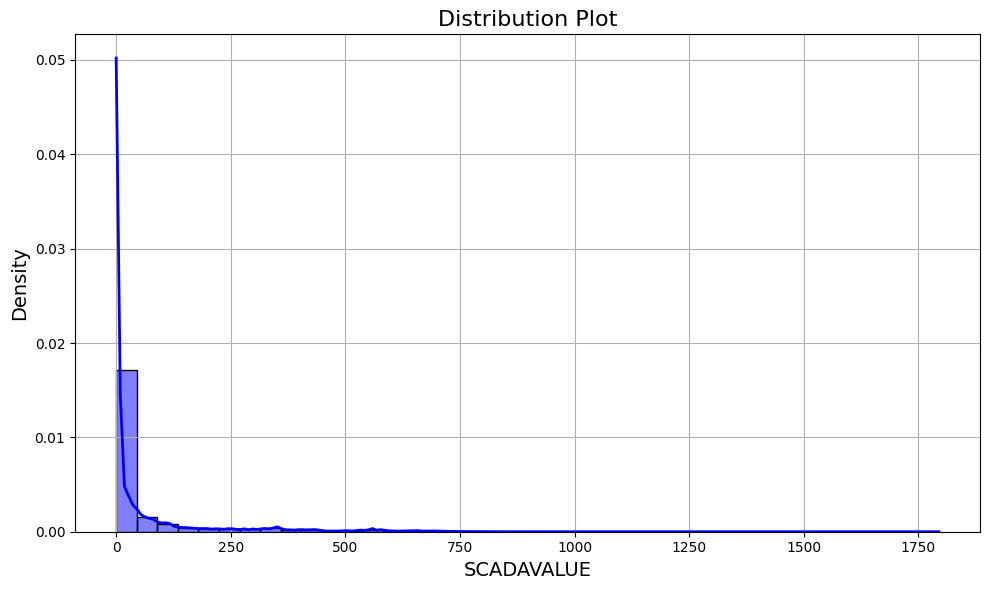

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [86]:
distribution_plot_seaborn(df=df_scada_sample[df_scada_sample['SCADAVALUE'] >= 0], column='SCADAVALUE')

<div style="background-color: lightblue; padding: 10px;">

- There are around 250k rows of negative values for power generation 0.25M/12.8M rows. My solution for this is dropping these values, because they may be errors when collecting data from generators.

- There are around 6.4M/12.8M rows (nearly 50% of data are 0) have power generation of 0MW. The reasons behind may be that the units did not collect data at that time point or they rounded the data to 0 because data is too small.

- Maximum values for power generation of an unit is 1783 MW.

- Distribution of SCADAVALUE is too much right skewed.
</div>

#### number of units

In [41]:
duid_lst = df_scada_sample.DUID.unique()

In [42]:
len(duid_lst)

538

In [43]:
registered_duid_lst = df_participants.DUID.unique()

In [44]:
len(registered_duid_lst)

525

<div style="background-color: lightblue; padding: 10px;">

- There are 538 units recorded data in UNIT_SCADA_VALUE.

- There are 525 units registered in the participants file.

- Now, let's move to explore is there any units that not in the registered participant file.
</div>

In [45]:
diff_lst = list(set(duid_lst) - set(registered_duid_lst))
print(diff_lst)  

[nan, 'DG_SA1', 'VBBL1', 'RT_VIC12', 'TB2BG1', 'TIBL1', 'PORTWF', 'BBATTERY', 'PIBESSG1', 'CAPBES1L', 'HVWWBA1L', 'DRXQDA01', 'DRXVQX01', 'RT_SA3', 'DG_TAS1', 'RT_SA2', 'RT_QLD1', 'PIBESSL1', 'BBATRYL1', 'TORRA3', 'VBBG1', 'DRXNQX01', 'LD04', 'HVGTS', 'HVWWBA1G', 'WALGRVG1', 'HPRG1', 'DRXNDA04', 'WANDBL1', 'RT_SA6', 'DRXVDX01', 'WDBESSG1', 'WALGRVL1', 'DRXQQE01', 'SATGN1', 'RT_VIC3', 'BOWWBA1L', 'DRXVDJ01', 'RT_NSW1', 'RT_VIC7', 'WDBESSL1', 'RT_VIC8', 'RT_VIC1', 'RESS1L', 'BALBL1', 'RT_NSW5', 'BALBG1', 'TORRA4', 'DRXVQX02', 'BOWWBA1G', 'DRXNDA03', 'WANDBG1', 'HPRL1', 'DPNTBL1', 'DG_QLD1', 'SLDCBLK1', 'RT_VIC5', 'RIVNBL2', 'RESS1G', 'DG_VIC1', 'BULBESL1', 'CBWWBA1L', 'RT_TAS1', 'RT_VIC11', 'TIBG1', 'DALNTH01', 'DG_NSW1', 'CBWWBA1G', 'BHBL1', 'GANNBL1', 'DPNTBG1', 'RT_SA1', 'DALNTHL1', 'DRXNDA01', 'SATGS1', 'LBBG1', 'PIONEER', 'CHBESSL1', 'BHBG1', 'MACKAYGT', 'RT_NSW4', 'DRXVDP01', 'LBBL1', 'RIVNBG2', 'RT_SA4', 'GANNBG1', 'CAPBES1G', 'RT_NSW2', 'TB2BL1', 'LD01', 'RT_NSW6', 'RT_VIC9', 'RT

In [52]:
df_scada_sample[df_scada_sample['DUID'].isin(diff_lst)].count()

I                 2091599
DISPATCH          2091599
UNIT_SCADA        2091599
1                 2091598
SETTLEMENTDATE    2091598
DUID              2091598
SCADAVALUE        2091598
LASTCHANGED         42583
dtype: int64

<div style="background-color: lightblue; padding: 10px;">

There are 2M/12.8M rows of recorded data in UNIT_SCADA data has units that were not in registered participants data.

That maybe labeled "Other" for energy source later.
</div>

#### number of energy sources 

In [53]:
df_participants['Fuel Source - Descriptor'].unique()

array(['Grid', 'Water', 'Solar', 'Diesel', 'Waste Coal Mine Gas', 'Wind',
       'Natural Gas', nan, 'Black Coal', 'Sewerage / Waste Water',
       'Coal Seam Methane', 'Bagasse', 'Landfill Methane / Landfill Gas',
       'Biogas - sludge', 'Solar ', 'Natural Gas / Diesel', 'Ethane',
       'Brown Coal', 'solar', 'Kerosene', '-', 'Natural Gas / Fuel Oil',
       'Bagasse and Diesel'], dtype=object)

In [54]:
df_participants['Fuel Source - Descriptor'].nunique()

22

<div style="background-color: lightblue; padding: 10px;">

There are 22 fuel energy sources.
</div>

### Generator information

#### stats

In [56]:
df_summary.describe()

,4,TRANSMISSIONLOSSFACTOR,DISTRIBUTIONLOSSFACTOR,MINIMUM_ENERGY_PRICE,MAXIMUM_ENERGY_PRICE,MIN_RAMP_RATE_UP,MIN_RAMP_RATE_DOWN,MAX_RAMP_RATE_UP,MAX_RAMP_RATE_DOWN,IS_AGGREGATED,5,6,7,LOAD_MINIMUM_ENERGY_PRICE,LOAD_MAXIMUM_ENERGY_PRICE,LOAD_MIN_RAMP_RATE_UP,LOAD_MIN_RAMP_RATE_DOWN,LOAD_MAX_RAMP_RATE_UP,LOAD_MAX_RAMP_RATE_DOWN,SECONDARY_TLF
count,323556.0,800249.000000,800249.000000,800249.000000,800249.000000,696717.000000,696717.000000,305844.000000,305844.000000,479924.000000,236070.0,121989.0,118634.0,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,356.000000
mean,4.0,0.984538,0.999575,-984.146660,11584.190027,1.891973,1.891973,74.086616,76.438086,0.087631,5.0,6.0,7.0,-965.856757,16902.472378,44.286486,44.286486,133.416216,133.416216,0.973453
std,0.0,0.043131,0.010969,44.961138,3070.012027,4.635980,4.635980,160.152982,167.091743,0.282757,0.0,0.0,0.0,58.279243,1019.873839,54.981608,54.981608,205.160607,205.160607,0.039962
min,4.0,0.674500,0.820000,-1284.100000,3372.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,6.0,7.0,-1047.590000,14497.000000,2.000000,2.000000,2.000000,2.000000,0.842300
25%,4.0,0.965000,1.000000,-1001.000000,9852.000000,0.000000,0.000000,6.000000,6.000000,0.000000,5.0,6.0,7.0,-999.600000,16423.590000,10.000000,10.000000,10.000000,10.000000,0.960125
50%,4.0,0.986600,1.000000,-986.400000,12500.000000,1.000000,1.000000,23.000000,23.000000,0.000000,5.0,6.0,7.0,-986.400000,17262.000000,33.000000,33.000000,40.000000,40.000000,0.987700
75%,4.0,1.000900,1.000000,-963.900000,13926.960000,3.000000,3.000000,60.000000,60.000000,0.000000,5.0,6.0,7.0,-938.500000,17493.000000,54.000000,54.000000,132.000000,132.000000,1.000400
max,4.0,1.284100,1.167550,-674.500000,19955.250000,288.000000,288.000000,1492.000000,1492.000000,1.000000,5.0,6.0,7.0,-828.400000,18332.750000,288.000000,288.000000,720.000000,720.000000,1.015500


<div style="background-color: lightblue; padding: 10px;">

TRANSMISSIONLOSSFACTOR is energy losses during transmission in the grid. 

DISTRIBUTIONLOSSFACTOR is column represents the factor used to account for energy losses that occur during the distribution of electricity from the generation source to the end consumers.

MINIMUM_ENERGY_PRICE is the minimum price for energy that a unit can offer, adjusted for transmission and distribution loss factors. But they have negative values. It could represent a situation where the energy price is pushed below zero to balance the market.

MIN_RAMP_RATE_UP is the minimum rate at which a unit can increase its output (in MW/min) when transitioning from a low to a high generation state. It indicates how quickly a generator can respond when there is an increased demand for electricity or when it is asked to increase its generation output.

MAX_RAMP_RATE_DOWN is the maximum rate at which a unit can decrease its output (in MW/min).

LOAD_MINIMUM_ENERGY_PRICE also has negative values.

</div>

#### dispatchable types

In [57]:
df_summary.DISPATCHTYPE.unique()

array(['GENERATOR', 'LOAD', nan, 'BIDIRECTIONAL'], dtype=object)

<div style="background-color: lightblue; padding: 10px;">

There are many null values.

LOAD: A load unit (consumer).

GENERATOR: A power generation unit.

BIDIRECTIONAL: A unit that can both generate and consume power, such as battery storage or hybrid systems.
</div>

#### regions

In [58]:
df_summary.REGIONID.unique()

array(['SA1', 'NSW1', 'VIC1', 'QLD1', 'TAS1', 'SNOWY1', nan], dtype=object)

<div style="background-color: lightblue; padding: 10px;">

There is SNOWY1 value, The Snowy Mountains Hydroelectric Scheme (SMHS) is a large-scale hydroelectric power system in southeastern Australia, primarily located in the Snowy Mountains. It spans for ACT, VIC, NSW.
</div>

#### number of stations

In [59]:
df_summary.STATIONID.nunique()

585

<div style="background-color: lightblue; padding: 10px;">

There are 585 stations.
</div>

#### check number of dispatchable units

In [60]:
df_summary.DUID.nunique()

933

<div style="background-color: lightblue; padding: 10px;">

There are over 900 dispatchable units in 585 stations. But there are only 500 units appearing in UNIT_SCADA.
</div>

In [62]:
summary_ids = df_summary.DUID.unique()
summary_ids_scada = df_scada_sample.DUID.unique()

In [63]:
diff_lst = list(set(summary_ids_scada) - set(summary_ids))
print(diff_lst)  

[]


<div style="background-color: lightblue; padding: 10px;">

There is no DUID in UNIT_SCADA that are not in SUMMARY file.
</div>

### Demand data

#### region and date

In [64]:
df_demand_sample.REGIONID.unique()

array(['TAS1', 'NSW1', 'SA1', 'QLD1', 'VIC1', nan], dtype=object)

In [66]:
df_demand_sample["SETTLEMENTDATE"] = pd.to_datetime(df_demand_sample["SETTLEMENTDATE"], format="%Y/%m/%d %H:%M:%S")
df_demand_sample.SETTLEMENTDATE.min()

Timestamp('2019-01-01 00:00:00')

In [67]:
df_demand_sample.SETTLEMENTDATE.max()

Timestamp('2025-01-31 00:00:00')

#### demand value

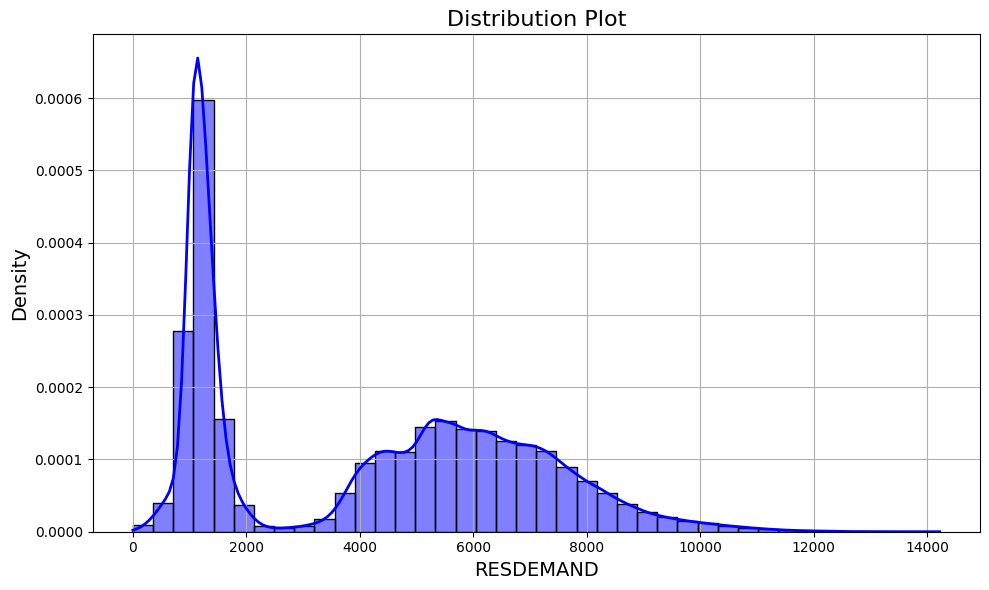

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [83]:
distribution_plot_seaborn(df=df_demand_sample[df_demand_sample['RESDEMAND'] >= 0], column='RESDEMAND')

In [84]:
df_demand_sample[df_demand_sample['RESDEMAND'] < 0]['DEMAND'].count()/df_demand_sample['RESDEMAND'].count()*100

0.012973203040156481

<div style="background-color: lightblue; padding: 10px;">

There are only 0.013% demand data which is negative values of demand column.

The distribution is right skewed and 
</div>

### Pricing data

#### region

In [85]:
df_price_sample.REGIONID.unique()

array(['SA1', 'TAS1', 'QLD1', 'NSW1', 'VIC1', nan], dtype=object)

#### price

In [87]:
df_price_sample[df_price_sample['RRP'] < 0]['RRP'].count()/df_price_sample['RRP'].count()*100

9.156700806539378

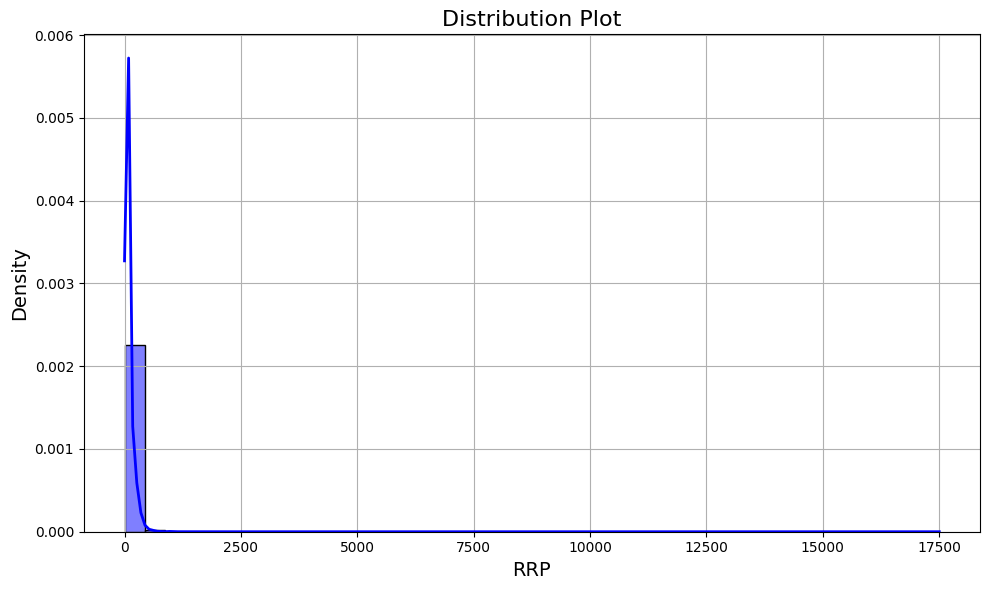

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [88]:
distribution_plot_seaborn(df=df_price_sample[df_price_sample['RRP'] >= 0], column='RRP')

## 2D Exploration

Explore [2D_EDA] files because the content may be too long.